In [1]:
import numpy as np 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
# 4a i 
def find_label(w, x, b):
    value = np.dot(w,x) + b
    if (value > 0 ):
        return 1
    else:
        return -1

In [4]:
# 4a ii
def run_perceptron(inputs, labels, max_iterations=1000):
    num_rows, num_columns = np.shape(inputs)
    w = np.zeros(num_columns)
    b = 0
    correct = 0
    iteration = 0
    shuffled = np.random.permutation(num_rows)

    
    while correct != num_rows and iteration < max_iterations:
        correct = 0
        for i in shuffled:
            x = inputs[i]
            y = labels[i]
            predicted_label = y * find_label(w, x, b)
            
            if predicted_label <= 0:
                w += y * x
                b += y
            else:
                correct += 1
        iteration += 1
    
    return w, b, iteration

In [5]:
# 4b
from sklearn import datasets 
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [6]:
x_subset = x[y != 2][:, [1,3]]
y_subset = y[y != 2]
y_subset[y_subset == 0] = -1

In [7]:
# 4c
w, b, iterations = run_perceptron(x_subset, y_subset)

In [8]:
def visualize_decision_boundary(X, y, w, b):
    # data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

    # decision boundary
    m = -w[0] / w[1]
    b = -b / w[1]
    x = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5)
    y = m * x + b
    plt.plot(x, y)

    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

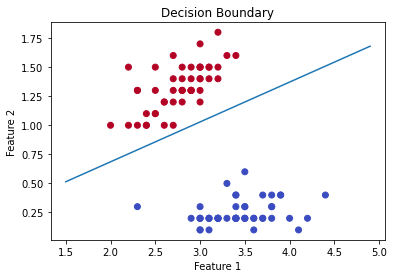

Converged after 2 iterations.


In [9]:
visualize_decision_boundary(x_subset, y_subset, w, b)
print(f"Converged after {iterations} iterations.")

In [10]:
iris_outputs = run_perceptron(x_subset, y_subset)
iris_outputs

(array([-2.5, 11. ]), 1, 2)

In [11]:
# 4d 
def count_perceptron(inputs, labels, max_iterations=1000):
    num_rows, num_columns = np.shape(inputs)
    w = np.zeros(num_columns)
    b = 0
    correct = 0
    iteration = 0
    shuffled = np.random.permutation(num_rows)

    
    while correct != num_rows and iteration < max_iterations:
        correct = 0
        for i in shuffled:
            x = inputs[i]
            y = labels[i]
            predicted_label = y * find_label(w, x, b)
            
            if predicted_label <= 0:
                w += y * x
                b += y
            else:
                correct += 1
            iteration += 1
    
    return iteration

[400, 200, 200, 200, 200, 200, 300, 200, 200, 200, 200, 200, 200, 200, 200, 300, 200, 200, 300, 200]


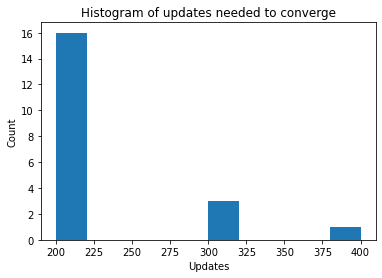

In [12]:
updates = []
for i in range(20):
    updates.append(count_perceptron(x_subset, y_subset))
print((updates))
plt.hist(updates)

plt.title("Histogram of updates needed to converge")
plt.xlabel("Updates")
plt.ylabel("Count")
plt.show()